## Кривоногов Н.В., INN, практическое задание № 3

1. Попробуйте улучшить работу нейронной сети (разобранную на уроке), обучавшейся на датасет Fashion-MNIST. Напишите в комментариях к уроку, какого результата вы добились от нейросети и что помогло улучшить её точность
2. Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow, неразобранные на уроке
3. *Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews.

In [1]:
# импорт библиотек: 

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

print(tf.__version__)

2.12.0


In [2]:
# загрузка датасета: 

from keras.datasets import fashion_mnist

(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

In [3]:
# назову классы удобнее для восприятия: 

class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

In [4]:
# категоризация: 

y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

In [5]:
# нормализация: 

X_train = X_train / 255.0
X_test = X_test / 255.0

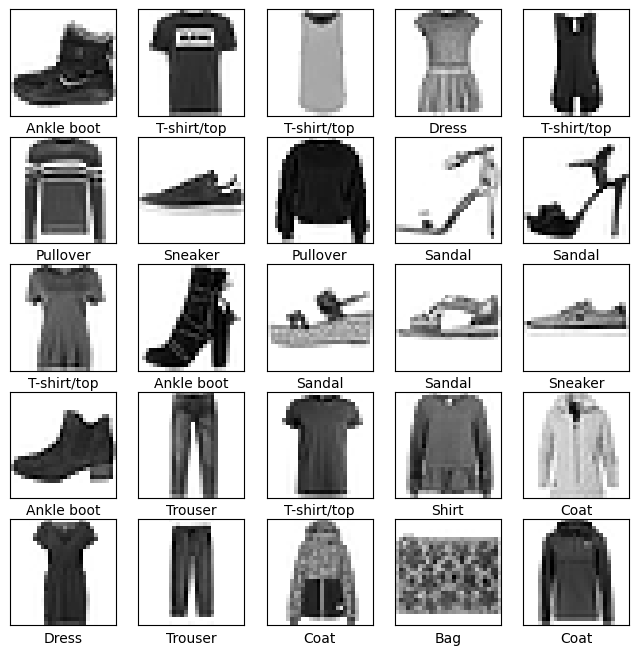

In [6]:
# посмотрю первые 25 изображений датасета: 

plt.figure(figsize=(8, 8))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_labels[i]])
plt.show()

In [7]:
# инициализация модели нейросети:

# level = 1
level = 2
# level = 4
# level = 9

inputs = Input(shape=(28, 28, 1), name='fashion') 
x = Flatten()(inputs)

for i in range(level):
    x = Dense(64, activation='linear', name=f'dense_{i}')(x)
    # x = Dense(64, activation='relu', name=f'dense_{i}')(x) # 128, 64, 32

outputs = Dense(10, activation='softmax', name='predictions')(x) 
# outputs = Dense(10, activation='sigmoid', name='predictions')(x) 

In [8]:
model = Model(inputs=inputs, outputs=outputs) 

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fashion (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_0 (Dense)             (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 predictions (Dense)         (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
# компиляция модели нейросети: 

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss=CategoricalCrossentropy(from_logits=True), # так как на выходе не сигмоида - считаем ошибку с логитов (активация "linear"): то, что поступает до сигмоиды
              metrics=['accuracy'])

In [11]:
# обучение модели нейросети:

num_epochs = 5
batch_size = 256

model.fit(X_train, y_train,
          epochs=num_epochs,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


235/235 [==============================] - 4s 11ms/step - loss: 0.6277 - accuracy: 0.7817 - val_loss: 0.5256 - val_accuracy: 0.8156
Epoch 2/5
235/235 [==============================] - 2s 7ms/step - loss: 0.4610 - accuracy: 0.8390 - val_loss: 0.4829 - val_accuracy: 0.8337
Epoch 3/5
235/235 [==============================] - 2s 9ms/step - loss: 0.4324 - accuracy: 0.8509 - val_loss: 0.4648 - val_accuracy: 0.8396
Epoch 4/5
235/235 [==============================] - 2s 10ms/step - loss: 0.4258 - accuracy: 0.8515 - val_loss: 0.4658 - val_accuracy: 0.8376
Epoch 5/5
235/235 [==============================] - 2s 7ms/step - loss: 0.4146 - accuracy: 0.8544 - val_loss: 0.4633 - val_accuracy: 0.8385


In [12]:
# оценка качества модели нейросети: 

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4633 - accuracy: 0.8385 - 419ms/epoch - 1ms/step

Test accuracy: 0.8385000228881836


In [13]:
# делаю предсказания: 

y_pred = np.argmax(model.predict(X_test), axis=1)

313/313 [==============================] - 1s 2ms/step


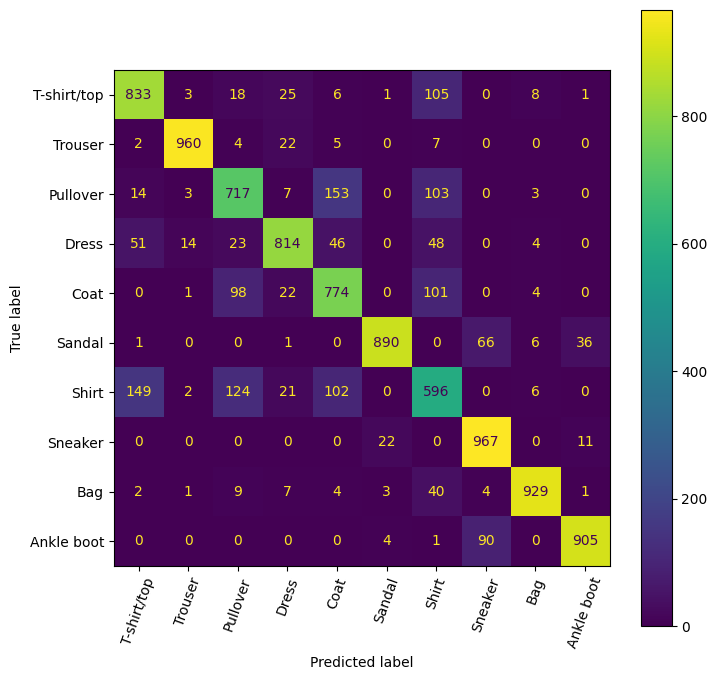

In [14]:
# отрисовываю матрицу ошибок: 

CM = confusion_matrix(y_test_labels, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=class_names)

fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(values_format='.3g', ax=ax)
plt.xticks(rotation=70)
plt.show();

In [15]:
# качество модели по каждому классу отдельно (полнота, точность):

print(classification_report(y_test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.72      0.72      0.72      1000
           3       0.89      0.81      0.85      1000
           4       0.71      0.77      0.74      1000
           5       0.97      0.89      0.93      1000
           6       0.60      0.60      0.60      1000
           7       0.86      0.97      0.91      1000
           8       0.97      0.93      0.95      1000
           9       0.95      0.91      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



Число нейронов в слое: 64, тип активации в скрытом слое: relu, тип активации в выходном слое: sigmoid, тип оптимизатора: Adam. 

- Число слоев = 2, метрики на train = 0.8702, на test = 0.8537.

- Число слоев = 3, метрики на train = 0.8765, на test = 0.8672.

- Число слоев = 5, метрики на train = 0.8762, на test = 0.8593.

- Число слоев = 10, метрики на train = 0.8736, на test = 0.8661.

Вывод 1: зависимость метрики от числа слоев имеет нелинейный характер. Так в данном примере метрика максимальна при числе слоев, равном трем. 

Число слоев: 3, тип активации в скрытом слое: relu, тип активации в выходном слое: sigmoid, тип оптимизатора: Adam.

- Число нейронов в слое = 128, метрики на train = 0.8871, на test = 0.8730.

- Число нейронов в слое = 64, метрики на train = 0.8755, на test = 0.8652.

- Число нейронов в слое = 32, метрики на train = 0.8674, на test = 0.8556.

Вывод 2: при увеличении количества нейронов в слое метрика возрастает (и наоборот соответственно). 

Число нейронов в слое: 64, число слоев: 3, тип активации в скрытом слое: relu, тип активации в выходном слое: sigmoid. 

- Оптимизатор SGD, метрики на train = 0.5687, на test = 0.5886.

- Оптимизатор Adam, метрики на train = 0.8755, на test = 0.8624.

- Оптимизатор RMSprop, метрики на train = 0.8714, на test = 0.8498.

Вывод 3: оптимизатор Adam - лучший, как на train, так и на test.

Число нейронов в слое: 64, число слоев: 3, тип оптимизатора: Adam. 

- Тип активации в скрытом слое: relu, тип активации в выходном слое: sigmoid, метрики на train = 0.8739, на test = 0.8578.

- Тип активации в скрытом слое: linear, тип активации в выходном слое: sigmoid, метрики на train = 0.8536, на test = 0.8354.

- Тип активации в скрытом слое: linear, тип активации в выходном слое: softmax, метрики на train = 0.8547, на test = 0.8278.

Вывод 4: комбинация типов акnивации relu и sigmoid показала себя с лучшей стороны.

Вывод: качество многоклассовой классификации в нейросети на тестовом наборе данных помогает улучшить подбор её оптимальных параметров, таких как: количество нейронов в слое, количество слоев, оптимизатор, функций активации в скрытых и выходном слоях. В моём случае это такие параметры соответственно: 128, 3, Adam, relu и sigmoid. 

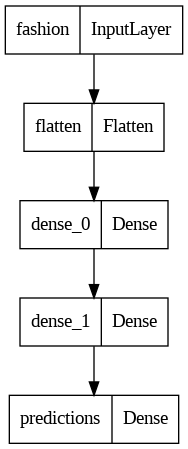

In [16]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [17]:
tf.config.list_physical_devices('GPU')

[]

In [18]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


Google colab сообщил об исчерпанном лимите ползования его GPU... 

In [19]:
from sklearn.metrics import r2_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Коэффициент детерминации на тренировочной выборке: {round(r2_train,2)}')
print(f'Коэффициент детерминации на тестовой выборке: {round(r2_test,2)}')

313/313 [==============================] - 0s 1ms/step
Коэффициент детерминации на тренировочной выборке: 0.77
Коэффициент детерминации на тестовой выборке: 0.74


In [20]:
print(f'Переобучение оказалось равным {round((round(r2_train,2) - round(r2_test,2)) * 100, 2)}%, что в целом довольно неплохо.')

Переобучение оказалось равным 3.0%, что в целом довольно неплохо.
